In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def OLS(y,y_hat):
    return (y - y_hat).dot(y - y_hat)
def R2 (y, y_hat):
    return 1 - OLS(y, y_hat) / OLS(y,y.mean())

def OLS_L2(y,y_hat,l2,w):
    return (y - y_hat).dot(y - y_hat) + l2*w.T.dot(w)


# GD with no reularzition
def GD(X,y,eta):
    
    w = np.random.randn(X.shape[1])
    J = []
    epochs = int(1e3)

    for i in range(epochs):
        y_hat = X.dot(w)
        J.append(OLS(y,y_hat))
        w -= eta*X.T.dot(y_hat - y)
    
    return (J,w,y_hat)

def J_Va (X1,y1,X2,y2):
    
    cv = []
    
    N_train = X1.shape[0]
    N_cv = X2.shape[0]
    
    for lambda1 in range(100):
        for lambda2 in range(100):
            w = np.random.randn(X1.shape[1])
    
            eta = 3e-5
            epochs = int(1e3)
    
            for t in range(epochs):
                y_hat_train = X1.dot(w)
                w -= eta*(X1.T.dot(y_hat_train - y1) + lambda2*w + lambda1*np.sign(w_l1))
        
            y_hat_cv = X2.dot(w)
    
            J_train = (1/N_train)*OLS(y1, y_hat_train)
            J_cv = (1/N_cv)*OLS(y2, y_hat_cv)
    
            cv.append((J_train, J_cv, lambda1, lambda2))
    return cv

In [3]:
np.random.seed(101)
df = pd.read_csv("./Project2Data/BlackFriday.csv")
df.drop(['User_ID', 'Product_ID','Product_Category_2','Product_Category_3'], axis=1, inplace = True)
columns_to_1hot = ['Gender','City_Category','Age','Occupation','Marital_Status','Product_Category_1']
df = pd.get_dummies(df, columns=columns_to_1hot)
df = df.sample(frac=1)

Train = int(df.shape[0] * 0.6)
Validate = int(df.shape[0] * 0.2)
Test = int(df.shape[0] - Train - Validate)

Train_Model =  df[:Train:]
Validate_Model = df[Train:Validate + Train:]
Test_Model = df[Validate + Train::]
    
    
D_Train = pd.get_dummies(Train_Model)
D_Train.drop("Purchase",axis='columns',inplace=True)

y1 = Train_Model.Purchase
x1 = D_Train
    
x1 = (x1 - x1.min()) / (x1.max() - x1.min())
X1 = np.vstack([np.array([1]*(x1.shape[0])), x1.T]).T
    
Id1 = np.identity(X1.shape[1])
Id2 = np.identity(X1.shape[1])
Id1[0,0] = 0

D_Validate = pd.get_dummies(Validate_Model)
D_Validate.drop("Purchase",axis='columns',inplace=True)

y2 = Validate_Model.Purchase
x2 = D_Validate

x2 = (x2 - x2.min()) / (x2.max() - x2.min())
X2 = np.vstack([np.array([1]*(x2.shape[0])), x2.T]).T


D_Test = pd.get_dummies(Test_Model)
D_Test.drop("Purchase",axis='columns',inplace=True)

y3 = Test_Model.Purchase
x3 = D_Test

x3 = (x3 - x3.min()) / (x3.max() - x3.min())
X3 = np.vstack([np.array([1]*(x3.shape[0])), x3.T]).T

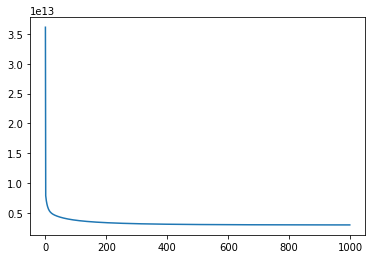

In [4]:
output = GD(X1,y1,1e-6)# J,w,y_hat
plt.plot(output[0])


A suitable learning speed is 1e-6

In [5]:
N_train = X1.shape[0]
N_cv = X2.shape[0]

J_train = (1/N_train)*OLS(y1, output[2])

y_hat_cv = X2.dot(output[1])

J_cv = (1/N_cv)*OLS(y2, y_hat_cv)

print("Training Error: {}".format(J_train))
print("Validation Error: {}".format(J_cv))

Training Error: 9145483.798479589
Validation Error: 9311889.958036693


underfiting - need  regularization L1/L2/both  (sparse martrix python)

In [6]:
cv = J_Va (X1,y1,X2,y2)
for i in cv[:10]:
    print(i)

C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Consultants\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in add


KeyboardInterrupt: 

In [ ]:
J_train = [i for i,j,k,m in cv]
J_cv = [j for i,j,k,m in cv]
lambda1 = [k for i,j,k,m in cv]
lambda2 = [m for i,j,k,m in cv]

o = J_cv.index(min(J_cv))

l1 = lambda1[o]
l2 = lambda2[o]

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(lambda2, J_train, label = "Training Error")
plt.plot(lambda2, J_cv, label = "Validation Error")
plt.legend()

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(lambda1, J_train, label = "Training Error")
plt.plot(lambda1, J_cv, label = "Validation Error")
plt.legend()

In [ ]:
w = np.random.randn(X1.shape[1])

eta = 3e-5
epochs = int(1e3)

for t in range(epochs):
    y_hat_train = X1.dot(w)
    w -= eta*(X1.T.dot(y_hat_train - y1) + l2*w + l1*np.sign(w))
    
y_hat_test = X3.dot(w)

N_test = X3.shape[0]
J_test = (1/N_test)*OLS(y3, y_hat_test)

print("Test Error: {}".format(J_test))